#   <center> Machine Learning - CSI5155 Fall 2019 <center>University of Ottawa 
##   <center> Project: Predict the Success of Bank Telemarketing Campaign
###  <center>Submitted by: Sri Lakshmi Vadlamani <center>Student ID: 300154172

# Table of Contents

1. **[Introduction](#1)**
2. **[Data preprocessing & Exploratory analysis](#2)** 
3. **[Model construction](#3)**
4. **[Feature Selection](#4)**
5. **[Statistical Significance](#5)**
6. **[Model evaluation](#6)**
7. **[Results](#7)**
8. **[Conclusion & Recommendations](#8)**
9. **[References](#9)**

<a id='#1'></a>
## 1. Introduction

The goal of this project is to predict the success of telemarketing calls for selling bank long-term deposits by employing several supervised machine learning models. Understanding customers' needs and developing better marketing strategies increases overall productivity of banking industry, thus reducing the expenditure on undesirable advertisements.  

The dataset for this project originates from the UCI Machine Learning Repository. This dataset is a modified version of the dataset published in the paper  [Moro et al., 2014].
”http://media.salford-systems.com/video/tutorial/2015/targeted_marketing.pdf”

The project was carried out as a part of course requirement of CSI5155-Machine Learning.

In [1]:
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# Load the telemarketing dataset
df = pd.read_csv("bank_full.csv")
df=df.drop(['Unnamed: 0'],axis=1)
print (df.shape)
df.head()

(41188, 16)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic_4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high_school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high_school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin,married,basic_6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high_school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no


The file includes 41188 rows and 16 columns as follows:
##### Bank client data:
- **1. age** : The age of customer
- **2. job** : Type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-      employed','services','student','technician','unemployed','unknown')
- **3. marital** : Marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- **4. education** : (categorical: 'Secondary','Primary','Teritiary','unknown')
- **5. default** : Has credit in default? (categorical: 'no','yes','unknown')
- **6. housing** : Has housing loan? (categorical: 'no','yes','unknown')
- **7. loan** : Has personal loan? (categorical: 'no','yes','unknown')

##### Related with the last contact of the current campaign:
- **8. contact** : Contact communication type (categorical: 'cellular','telephone')
- **9. month** : Last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- **10. day_of_week** : Last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- **11. duration** : Last contact duration, in seconds (numeric). 

###### Other attributes:
- **12. campaign** : Number of contacts performed during this campaign and for this client (numeric, includes last contact)
- **13. pdays** : Number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means clients were not previously contacted)
- **14. previous** : Number of contacts performed before this campaign and for this client (numeric)
- **15. poutcome** : Outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

###### Target Variable
- **16. y** : Has the client subscribed a term deposit? (binary: 'yes','no')

<a id='#2'></a>
## 2. Data preprocessing & Exploratory analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
age            41188 non-null int64
job            41188 non-null object
marital        41188 non-null object
education      41188 non-null object
default        41188 non-null object
housing        41188 non-null object
loan           41188 non-null object
contact        41188 non-null object
month          41188 non-null object
day_of_week    41188 non-null object
duration       41188 non-null int64
campaign       41188 non-null int64
pdays          41188 non-null int64
previous       41188 non-null int64
poutcome       41188 non-null object
y              41188 non-null object
dtypes: int64(5), object(11)
memory usage: 5.0+ MB


#### 1. I have dropped the 'duration' variable as the value of the variable will only be known at the end of the call. Hence it does not play any role in predicting the features needed for successful telemarketing

In [4]:
df=df.drop(['duration'],axis=1)

#### 2. Change column name 'y' to a meaningfull name 'client-response' .

In [5]:
df.rename(index=str, columns={'y': 'client-response'}, inplace = True)

#### 3.Checking missing values for categorical variables and fixing them.

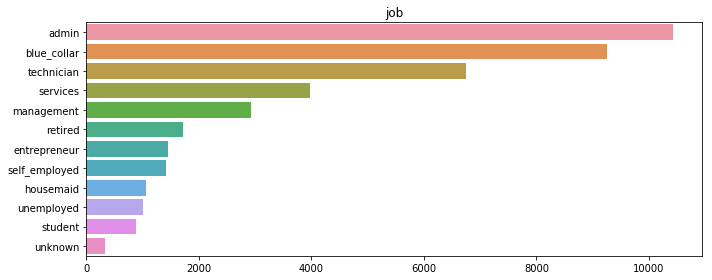

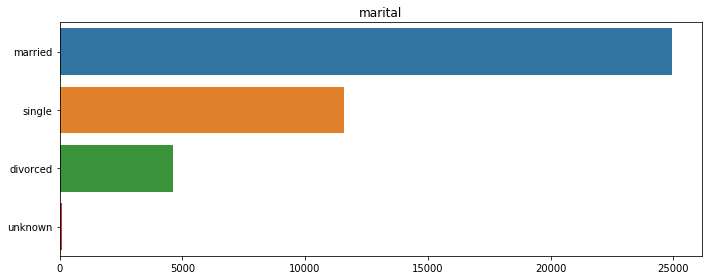

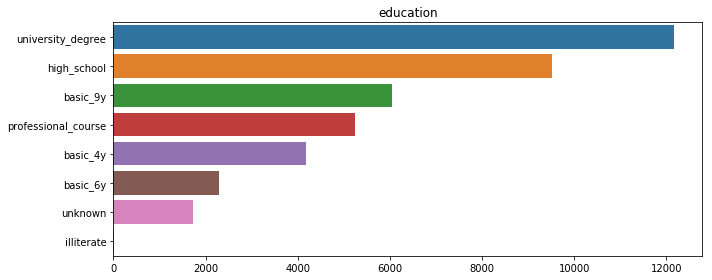

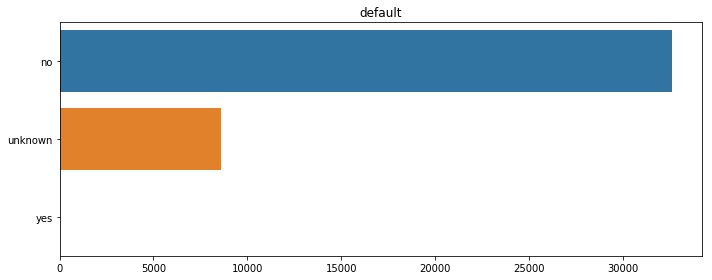

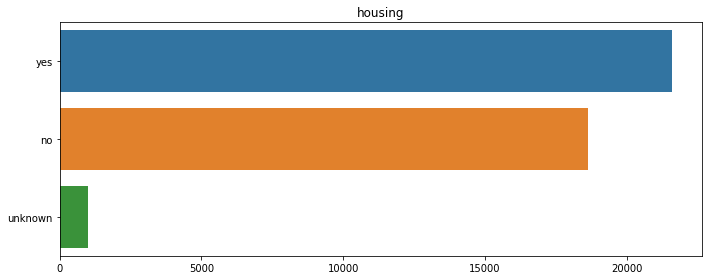

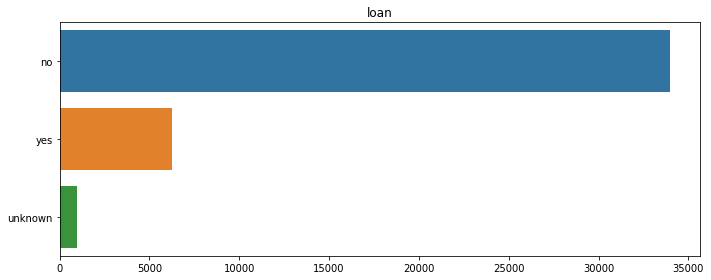

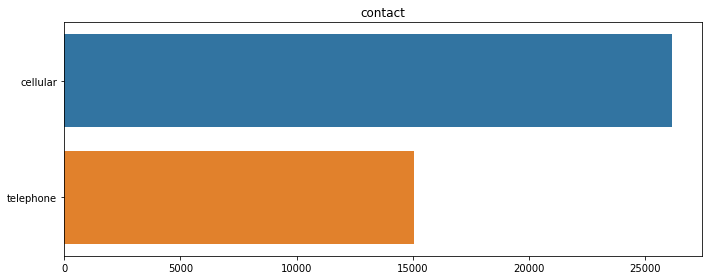

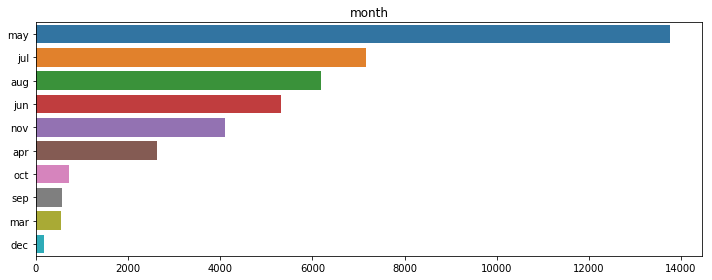

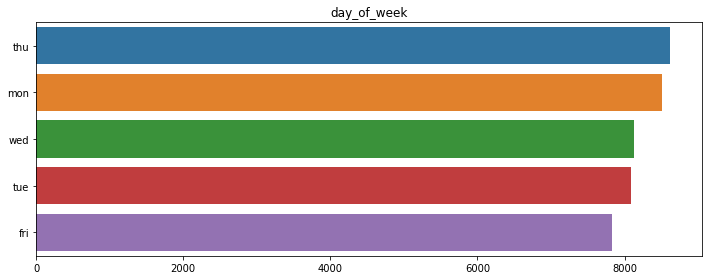

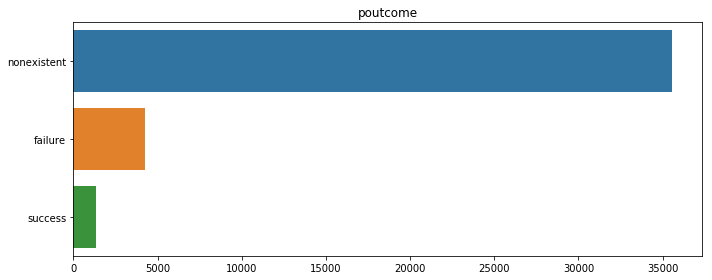

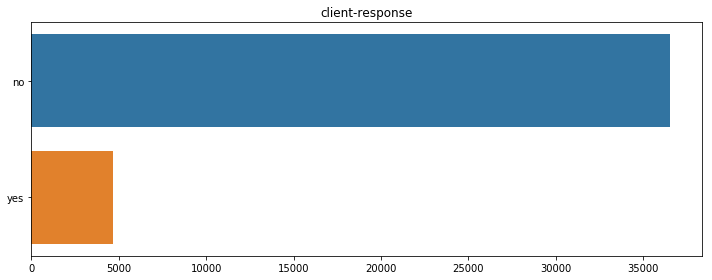

In [6]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'day_of_week', 'poutcome','client-response']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()
    plt.savefig(str(col)+".png")

**Inference:** 
>The unknown values percentages for jobs, marital, education, default, housing and loan columns in the data set are 0.8% ,0.2%, 4%, 20%, 2.4%, 2.4% of total respectively.

>There are many ways to handle missing data. One of the ways is to discard the row if the percentage of missing data is negligible.
Other method is to smartly infer the value of the unknown variable from the other variables. This a way of doing an imputation where other independent variables are used to infer the value of the missing variable. This doesn't gurantee that all missing values will be addressed.

>The number of unknowns for 'marital','housing', 'job', 'education' and 'loan' is very low. So, I decided to remove those rows with null values.

>The unknown for 'default' variable are considered to be recorded as unknown. It may be possible that customer is not willing to disclose this information to the banking representative. Hence the unknown value in 'default' is actually a separate value.

In [7]:
# delete row with unknown values in marital, loan and housing coulumns.
df = df.drop(df[df.education == 'unknown'].index, axis = 0, inplace = False)
df = df.drop(df[df.marital == 'unknown'].index, axis = 0, inplace = False)
df = df.drop(df[df.loan == 'unknown'].index, axis = 0, inplace = False)
df = df.drop(df[df.job == 'unknown'].index, axis = 0, inplace = False)

In [8]:
df.shape

(38245, 15)

#### 4.Checking missing values for numerical variables and fixing them.

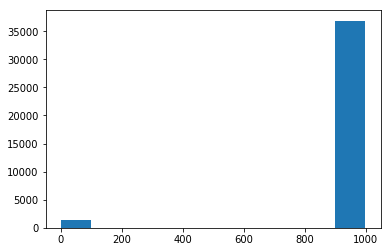

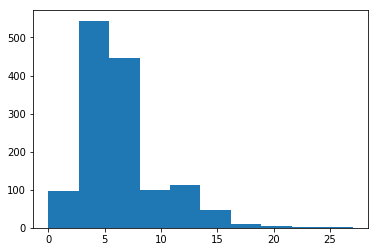

In [9]:
# lets examine the missing values in pdays
# Filter out missing values encoded with '999' value when plotting the histogram of values in order to properly understand the distribution of the known values.
plt.hist(df['pdays'])
plt.savefig("pday1.png")
plt.show()


df1=df.loc[df.pdays != 999]
plt.hist(df1['pdays'])
plt.savefig("pday2.png")
plt.show()


In [10]:
# Now, to infer the missing values in 'pdays',  cross-tabulation between 'pdays' and 'poutcomes' is made.
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx
cross_tab(df,'pdays','poutcome')

,nonexistent,failure,success
pdays,,,
0,0.0,0.0,15.0
1,0.0,0.0,24.0
2,0.0,0.0,57.0
3,0.0,4.0,389.0
4,0.0,2.0,104.0
5,0.0,4.0,41.0
6,0.0,24.0,355.0
7,0.0,15.0,37.0
8,0.0,4.0,10.0


**Inference:** 
> As it can be see from the above table, the majority of the values for 'pdays' are missing. The majority of these missing values occur when the 'poutcome' is 'non-existent'. This means that the majority of the values in 'pdays' are missing because the customer was never contacted before. To deal with this variable, pdays is converted from numerical to categorical.

> The pdays is binned into 4 categories and binarized. pdays_999, pdays_1-9, pdays_10-19, and pdays_20-29.

In [11]:
df['pdays_999'] = 0
df['pdays_1_9'] = 0
df['pdays_10_19'] = 0
df['pdays_20_29'] = 0
df['pdays_999'][df['pdays']==999] = 1
df['pdays_1_9'][(df['pdays']>=1) & (df['pdays']<=9)] = 1
df['pdays_10_19'][(df['pdays']>=10) & (df['pdays']<=19)] = 1
df['pdays_20_29'][(df['pdays']>=20) & (df['pdays']<=29)]= 1
df=df.drop(['pdays'],axis=1)

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'previous', 'poutcome',
       'client-response', 'pdays_999', 'pdays_1_9', 'pdays_10_19',
       'pdays_20_29'],
      dtype='object')

#### 5.Analising the data distribution by plotting graphs for numerical fields

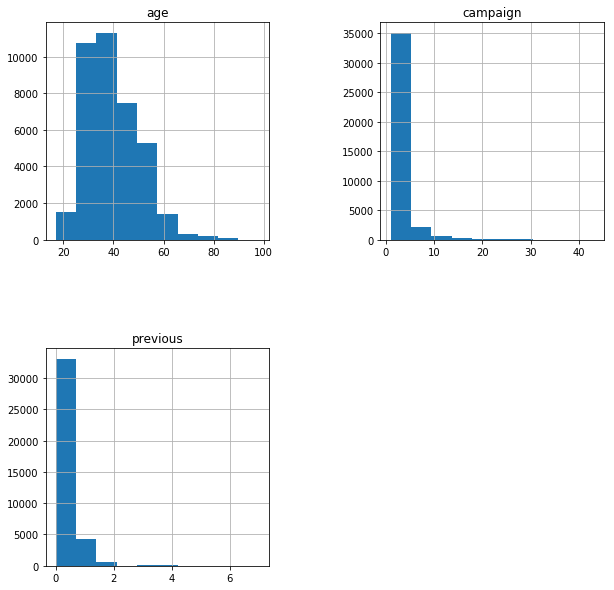

In [13]:
header = ['age','campaign','previous']
df.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.savefig("numerical.png")
plt.show()


**Inference:** 
>It can be seen that the data is not evenly distributed, therefore we need to standardize

In [14]:
#using minmax scalar to standardize the columns
idx_numeric=[0,10,11]
scaler = MinMaxScaler()
df[df.columns[idx_numeric]] = scaler.fit_transform(df[df.columns[idx_numeric]])

#### 6. Encoding the categorical data
Categorical variables can be either Ordinal or Nominal. 

'poutcome', 'default', 'housing','loan' and 'client response' are ordinal variables in the dataset. These can be handled by coding them to **'-1','0','1'.**

'job', 'maritial', 'education', 'contact', 'month', 'day_of_week' are Nominal Variables in the dataset. These can be handled by **one hot encoding.**

In [15]:
df['poutcome'] = df['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
df['default'] = df['default'].map({'yes': -1,'unknown': 0,'no': 1})
df['housing'] = df['housing'].map({'yes': -1,'no': 1})
df['loan'] = df['loan'].map({'yes': -1,'no': 1})
df['client-response'] = df['client-response'].map({'yes': 1,'no': 0})

In [16]:
nominal = ['job','marital','education','contact','month','day_of_week']
df = pd.get_dummies(df,columns=nominal)
df.head()

,age,default,housing,loan,campaign,previous,poutcome,client-response,pdays_999,pdays_1_9,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,1,1,1,0.0,0.0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,0.493827,0,1,1,0.0,0.0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,0.246914,1,-1,1,0.0,0.0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,0.283951,1,1,1,0.0,0.0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,0.481481,1,1,-1,0.0,0.0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [17]:
df.columns

Index(['age', 'default', 'housing', 'loan', 'campaign', 'previous', 'poutcome',
       'client-response', 'pdays_999', 'pdays_1_9', 'pdays_10_19',
       'pdays_20_29', 'job_admin', 'job_blue_collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self_employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic_4y', 'education_basic_6y', 'education_basic_9y',
       'education_high_school', 'education_illiterate',
       'education_professional_course', 'education_university_degree',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed'],
      dtype='object')

In [18]:
df.to_csv('bank_full_clean.csv') 

<a id='#3'></a>
## 3. Model Construction

Since the dataset is highly imbalanced, **cost sensitive learning**, **ensembles of classifiers** and **Oversmapling-SMOTE** are used to deal with the class imbalance of the telemarketing dataset.

We train and test five types of classifiers on all the imbalance techniques and pick the one with good metrics.

The five classifiers are 
1. Logistic regression (Linear classification)
2. Decision tree (Tree based)
3. Support Vector Machine (Distance based)
4. Skope rules (Rule based)
5. Random forest (Ensemble)

In [19]:
df_clean = pd.read_csv("bank_full_clean.csv")
df_clean=df_clean.drop(['Unnamed: 0'],axis=1)
# Dividng data and target sets 
X = df_clean.drop(columns='client-response')
Y = df_clean['client-response']

In [20]:
from sklearn.model_selection  import train_test_split, cross_val_score

#dividing into train(67%) and test(33%) data
X_train, X_test, Y_train, Y_test, = train_test_split(X, Y, test_size=0.33, random_state=42)

#The cost matrix for the bank marketing
cost_mat_train = np.zeros((len(Y_train),4))
#false positives cost 1
cost_mat_train[:,0]=1
#false negatives cost 11
cost_mat_train[:,1]=11
#true positives cost 0
cost_mat_train[:,2]=0
#true negative cost 0
cost_mat_train[:,3]=0
 
cost_mat_test = np.zeros((len(Y_test),4))
cost_mat_test[:,0]=1
cost_mat_test[:,1]=11
cost_mat_test[:,2]=0
cost_mat_test[:,3]=0

In [21]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,roc_auc_score,roc_curve,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from skrules import SkopeRules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from costcla.metrics import cost_loss, savings_score
from costcla.models import CostSensitiveLogisticRegression, CostSensitiveDecisionTreeClassifier, CostSensitiveRandomForestClassifier

C:\Users\ganip\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\ganip\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Cost Sensitive Matrix: 
Table 4 and Table 5 show the confusion matrix and the cost matrix for the bank direct marketing. 

In Table 5, there are four notations used to represent the error costs involved, namely, Cnn, Cny, Cyn and Cyy. Take the example of Cyn, it is the cost of misclassifying an actual class YES to Class NO. We assume, in general, predicting a class correctly does not cost anything. Instead, they are regarded as “benefits” [7]. Therefore, the error cost for Cnn and Cyy are both zero. 

The remaining error costs are: 
(1) the cost of misclassifying a potential customer to be non-subscriber (Cyn) and 
(2) the cost of misclassifying a non-potential customer to be a potential one (Cny). Obviously, Cyn is higher than Cny as the bank will lose a possible long term earning if it does not approach the potential customer. 

Since we do not have the actual error costs, it will be realistic to train classifiers with different Cyn values (from 1 to 11) and then evaluate them. For relative comparison, Cny shall be set to one. To compare cost sensitive classifiers, the total cost metric can be used. The lower the cost, the better a classifier is.
<td><img src='Untitled.png' width="1000"><td>

#### 1. Classifiers on unbalanced data

In [22]:
#---------------------------------------Logistic Regression Classifier-----------------------------------
LR = LogisticRegression()
LR.fit(X_train,  Y_train)
Y_pred = LR.predict(X_test)
Y_pred_proba = LR.predict_proba(X_test)[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
cm1=np.array([[tp,fp],[fn,tn]])
score1 = cross_val_score(LR, X, Y, cv=10, scoring='accuracy')
Acc1 = score1.mean()
pre1 = 1.*tp/(tp+fp)
rec1 = 1.*tp/(tp+fn)
f1_1  = 2*((pre1*rec1)/(pre1+rec1))
auc1 = roc_auc_score(Y_test,Y_pred_proba)
costloss1 = cost_loss(Y_test,Y_pred,cost_mat_test)

#----------------------------------------Decision tree classifier---------------------------------------------
DT = DecisionTreeClassifier()
DT.fit(X_train,  Y_train)
Y_pred = DT.predict(X_test)
Y_pred_proba = DT.predict_proba(X_test)[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
cm2=np.array([[tp,fp],[fn,tn]])
score2 = cross_val_score(DT, X, Y, cv=10, scoring='accuracy')
Acc2 = score2.mean()
pre2 = 1.*tp/(tp+fp)
rec2 =  1.*tp/(tp+fn)
f1_2  = 2*((pre2*rec2)/(pre2+rec2))
auc2 = roc_auc_score(Y_test,Y_pred_proba)
costloss2 = cost_loss(Y_test,Y_pred,cost_mat_test)

#--------------------------------------Support vector machine--------------------------------------------------- 
SVM = KNeighborsClassifier(n_neighbors=3)
SVM.fit(X_train,  Y_train)
Y_pred = SVM.predict(X_test)
Y_pred_proba = SVM.predict_proba(X_test)[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
cm3 = np.array([[tp,fp],[fn,tn]])
score3 = cross_val_score(SVM, X, Y, cv=10, scoring='accuracy')
Acc3 = score3.mean()
pre3 = 1.*tp/(tp+fp)
rec3 =  1.*tp/(tp+fn)
f1_3  =  2*((pre3*rec3)/(pre3+rec3))
auc3 = roc_auc_score(Y_test,Y_pred_proba)
costloss3 = cost_loss(Y_test,Y_pred,cost_mat_test)

#----------------------------------------Skoperules Classifier-------------------------------------------------
feature_names=['age', 'default', 'housing', 'loan', 'campaign', 'previous', 'poutcome','pdays_999', 'pdays_1_9', 
               'pdays_10_19','pdays_20_29', 'job_admin', 'job_blue_collar', 'job_entrepreneur','job_housemaid',
               'job_management', 'job_retired', 'job_self_employed','job_services', 'job_student', 'job_technician',
               'job_unemployed','marital_divorced', 'marital_married', 'marital_single','education_basic_4y',
               'education_basic_6y', 'education_basic_9y','education_high_school', 'education_illiterate',
               'education_professional_course', 'education_university_degree','contact_cellular', 'contact_telephone',
               'month_apr', 'month_aug','month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may','month_nov',
               'month_oct', 'month_sep', 'day_of_week_fri','day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
               'day_of_week_wed'] 

SR = SkopeRules(max_depth_duplication=None,n_estimators=30,precision_min=0.2,recall_min=0.01,feature_names=feature_names)
SR.fit(X_train,  Y_train)
Y_pred = SR.predict(X_test)
#Y_pred_proba = SR.predict_proba(X_test)[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
cm4 = np.array([[tp,fp],[fn,tn]])
score4 = cross_val_score(SR, X, Y, cv=10, scoring='accuracy')
Acc4 = score4.mean()
pre4 = 1.*tp/(tp+fp)
rec4 =  1.*tp/(tp+fn)
f1_4  =  2*((pre3*rec3)/(pre3+rec3))
auc4 = 0
#auc4 = roc_auc_score(Y_test,Y_pred_proba)
costloss4 = cost_loss(Y_test,Y_pred,cost_mat_test)
                
#----------------------------------------Random Forest Classifier------------------------------------------------- 
RF = RandomForestClassifier()
RF.fit(X_train,  Y_train)
Y_pred = RF.predict(X_test)
Y_pred_proba = RF.predict_proba(X_test)[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
cm5 = np.array([[tp,fp],[fn,tn]])
score5 = cross_val_score(RF, X, Y, cv=10, scoring='accuracy')
Acc5 = score5.mean()
pre5 =  1.*tp/(tp+fp)
rec5 =  1.*tp/(tp+fn)
f1_5  =  2*((pre4*rec4)/(pre4+rec4))
auc5 = roc_auc_score(Y_test,Y_pred_proba)
costloss5 = cost_loss(Y_test,Y_pred,cost_mat_test)



In [23]:
UB = pd.DataFrame({
    'Metric': ['confusion matrix','Accuracy', 'Precision', 'Recall', 'F1 Score','auc','costloss'],
    'LR_UB': [cm1, Acc1, pre1, rec1, f1_1, auc1, costloss1],
    'DT_UB' : [cm2, Acc2, pre2, rec2, f1_2, auc2, costloss2],
    'SVM_UB' : [cm3, Acc3, pre3, rec3, f1_3, auc3, costloss3],
    'SR_UB' : [cm4, Acc4, pre4, rec4, f1_4, auc4, costloss4],
    'RF_UB': [cm5, Acc5, pre5, rec5, f1_5, auc5, costloss5]})
UB 

,Metric,LR_UB,DT_UB,SVM_UB,SR_UB,RF_UB
0,confusion matrix,"[[258, 122], [1171, 11070]]","[[424, 1115], [1005, 10077]]","[[264, 317], [1165, 10875]]","[[485, 420], [944, 10772]]","[[303, 310], [1126, 10882]]"
1,Accuracy,0.824748,0.620559,0.784434,0.893573,0.7104
2,Precision,0.678947,0.275504,0.454389,0.535912,0.49429
3,Recall,0.180546,0.296711,0.184745,0.339398,0.212036
4,F1 Score,0.28524,0.285714,0.262687,0.262687,0.415596
5,auc,0.75962,0.602507,0.634868,0,0.712959
6,costloss,13003,12170,13132,10804,12696


#### 2. Cost sensitive learning - COSTCLA scikit learn package

In [24]:
# --------------------------Cost sensitive Logistic Regression Classifier-----------------------------------------------
LR_cclr = CostSensitiveLogisticRegression()
LR_cclr.fit(np.array(X_train),  np.array(Y_train), cost_mat_train)
Y_pred = LR_cclr.predict(X_test)
Y_pred_proba = LR_cclr.predict_proba(X_test)[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
cm1=np.array([[tp,fp],[fn,tn]])
Acc1 = accuracy_score(Y_test,Y_pred)
pre1 = 1.*tp/(tp+fp)
rec1 = 1.*tp/(tp+fn)
f1_1  = 2*((pre1*rec1)/(pre1+rec1))
auc1 = roc_auc_score(Y_test,Y_pred_proba)
costloss1 = cost_loss(Y_test,Y_pred,cost_mat_test)

#-------------------------------Cost sensitive Decision tree classifier-------------------------------------------------
DT_cclr = CostSensitiveDecisionTreeClassifier()
DT_cclr.fit(np.array(X_train),  np.array(Y_train), cost_mat_train)
Y_pred = DT_cclr.predict(np.array(X_test))
Y_pred_proba = DT_cclr.predict_proba(np.array(X_test))[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
cm2=np.array([[tp,fp],[fn,tn]])
Acc2 = accuracy_score(Y_test,Y_pred)
pre2 = 1.*tp/(tp+fp)
rec2 =  1.*tp/(tp+fn)
f1_2  = 2*((pre2*rec2)/(pre2+rec2))
auc2 = roc_auc_score(Y_test,Y_pred_proba)
costloss2 = cost_loss(Y_test,Y_pred,cost_mat_test)

#--------------------------------Cost sensitive Support vector machine------------------------------------------------- 
SVM_cclr = SVC(kernel='linear', class_weight={1: 11},probability=True)
SVM_cclr.fit(X_train,  Y_train )
Y_pred = SVM_cclr.predict(X_test)
Y_pred_proba = SVM_cclr.predict_proba(X_test)[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
cm3 = np.array([[tp,fp],[fn,tn]])
Acc3 = accuracy_score(Y_test,Y_pred)
pre3 =1.*tp/(tp+fp)
rec3 =  1.*tp/(tp+fn)
f1_3  =  2*((pre3*rec3)/(pre3+rec3))
auc3 = roc_auc_score(Y_test,Y_pred_proba)
costloss3 = cost_loss(Y_test,Y_pred,cost_mat_test)

#-------------------------------Cost sensitive Random Forest Classifier---------------------------------------------------- 
RF_cclr = CostSensitiveRandomForestClassifier()
RF_cclr.fit(np.array(X_train),  np.array(Y_train), cost_mat_train)
Y_pred = RF_cclr.predict(np.array(X_test))
Y_pred_proba = RF_cclr.predict_proba(np.array(X_test))[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
cm4 = np.array([[tp,fp],[fn,tn]])
Acc4 = accuracy_score(Y_test,Y_pred)
pre4 = 1.*tp/(tp+fp)
rec4 =  1.*tp/(tp+fn)
f1_4  =  2*((pre4*rec4)/(pre4+rec4))
auc4 = roc_auc_score(Y_test,Y_pred_proba)
costloss4 = cost_loss(Y_test,Y_pred,cost_mat_test)



In [25]:
CSCLR = pd.DataFrame({
    'Metric': ['confusion matrix','Accuracy', 'Precision', 'Recall', 'F1 Score','auc','costloss'],
    'LR_CSCLR': [cm1, Acc1, pre1, rec1, f1_1, auc1, costloss1],
    'DT_CSCLR' : [cm2, Acc2, pre2, rec2, f1_2, auc2, costloss2],
    'SVM_CSCLR' : [cm3, Acc3, pre3, rec3, f1_3, auc3, costloss3],
    'RF_CSCLR': [cm4, Acc4, pre4, rec4, f1_4, auc4, costloss4]})
CSCLR

,Metric,LR_CSCLR,DT_CSCLR,SVM_CSCLR,RF_CSCLR
0,confusion matrix,"[[1304, 10273], [125, 919]]","[[1167, 5611], [262, 5581]]","[[1032, 3946], [397, 7246]]","[[1239, 6512], [190, 4680]]"
1,Accuracy,0.176135,0.534664,0.655891,0.46898
2,Precision,0.112637,0.172175,0.207312,0.15985
3,Recall,0.912526,0.816655,0.722183,0.86704
4,F1 Score,0.200523,0.284391,0.322148,0.269935
5,auc,0.534065,0.664934,0.761582,0.703992
6,costloss,11648,8493,8313,8602


#### 3. Imbalance Ensemble with different classifiers

In [26]:
from imblearn.ensemble import BalancedBaggingClassifier

#------------------------------Logistic Regression Classifier-----------------------------------
bbc_lr = BalancedBaggingClassifier(base_estimator=LogisticRegression(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

bbc_lr.fit(X_train,  Y_train)
Y_pred = bbc_lr.predict(X_test)
Y_pred_proba = bbc_lr.predict_proba(X_test)[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
cm1=np.array([[tp,fp],[fn,tn]])
score1 = cross_val_score(bbc_lr, X, Y, cv=10, scoring='accuracy')
Acc1 = score1.mean()
pre1 = 1.*tp/(tp+fp)
rec1 = 1.*tp/(tp+fn)
f1_1  = 2*((pre1*rec1)/(pre1+rec1))
auc1 = roc_auc_score(Y_test,Y_pred_proba)
costloss1 = cost_loss(Y_test,Y_pred,cost_mat_test)

#------------------------------Decision tree classifier------------------------------------------
bbc_dt = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
bbc_dt.fit(X_train,  Y_train)
Y_pred =bbc_dt.predict(X_test)
Y_pred_proba = bbc_dt.predict_proba(X_test)[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
cm2=np.array([[tp,fp],[fn,tn]])
score2 = cross_val_score(bbc_dt, X, Y, cv=10, scoring='accuracy')
Acc2 = score2.mean()
pre2 = 1.*tp/(tp+fp)
rec2 = 1.*tp/(tp+fn)
f1_2  = 2*((pre2*rec2)/(pre2+rec2))
auc2 = roc_auc_score(Y_test,Y_pred_proba)
costloss2 = cost_loss(Y_test,Y_pred,cost_mat_test)

#---------------------------------Support vector machine------------------------------------------------ 
bbc_svm = BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
bbc_svm.fit(X_train,  Y_train)
Y_pred = bbc_svm.predict(X_test)
Y_pred_proba = bbc_svm.predict_proba(X_test)[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
cm3 = np.array([[tp,fp],[fn,tn]])
score3 = cross_val_score(bbc_svm, X, Y, cv=10, scoring='accuracy')
Acc3 = score3.mean()
pre3 = 1.*tp/(tp+fp)
rec3 =   1.*tp/(tp+fn)
f1_3  =  2*((pre3*rec3)/(pre3+rec3))
auc3 = roc_auc_score(Y_test,Y_pred_proba)
costloss3 = cost_loss(Y_test,Y_pred,cost_mat_test)

#----------------------------------------Skoperules Classifier-------------------------------------------------
feature_names=['age', 'default', 'housing', 'loan', 'campaign', 'previous', 'poutcome','pdays_999', 'pdays_1_9', 
               'pdays_10_19','pdays_20_29', 'job_admin', 'job_blue_collar', 'job_entrepreneur','job_housemaid',
               'job_management', 'job_retired', 'job_self_employed','job_services', 'job_student', 'job_technician',
               'job_unemployed','marital_divorced', 'marital_married', 'marital_single','education_basic_4y',
               'education_basic_6y', 'education_basic_9y','education_high_school', 'education_illiterate',
               'education_professional_course', 'education_university_degree','contact_cellular', 'contact_telephone',
               'month_apr', 'month_aug','month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may','month_nov',
               'month_oct', 'month_sep', 'day_of_week_fri','day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
               'day_of_week_wed'] 

estimator = SkopeRules(max_depth_duplication=None,n_estimators=30,precision_min=0.2,recall_min=0.01,feature_names=feature_names)
bbc_sr = BalancedBaggingClassifier(base_estimator=estimator, sampling_strategy='auto',replacement=False,random_state=0)
bbc_sr.fit(X_train,  Y_train)
Y_pred = bbc_sr.predict(X_test)
#Y_pred_proba = SR.predict_proba(X_test)[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
cm4 = np.array([[tp,fp],[fn,tn]])
score4 = cross_val_score(bbc_sr, X, Y, cv=10, scoring='accuracy')
Acc4 = score4.mean()
pre4 = 1.*tp/(tp+fp)
rec4 =  1.*tp/(tp+fn)
f1_4  =  2*((pre3*rec3)/(pre3+rec3))
auc4 = 0
#auc4 = roc_auc_score(Y_test,Y_pred_proba)
costloss4 = cost_loss(Y_test,Y_pred,cost_mat_test)

#---------------------------------Random Forest Classifier------------------------------------------------ 
bbc_rf = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

bbc_rf.fit(X_train,  Y_train)
Y_pred = bbc_rf.predict(X_test)
Y_pred_proba = bbc_rf.predict_proba(X_test)[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
cm5 = np.array([[tp,fp],[fn,tn]])
score5 = cross_val_score(bbc_rf, X, Y, cv=10, scoring='accuracy')
Acc5 = score4.mean()
pre5 = 1.*tp/(tp+fp)
rec5 =  1.*tp/(tp+fn)
f1_5  =  2*((pre4*rec4)/(pre4+rec4))
auc5 = roc_auc_score(Y_test,Y_pred_proba)
costloss5 = cost_loss(Y_test,Y_pred,cost_mat_test)



In [27]:
BBC = pd.DataFrame({
    'Metric': ['confusion matrix','Accuracy', 'Precision', 'Recall', 'F1 Score','auc','costloss'],
    'LR_BBC': [cm1, Acc1, pre1, rec1, f1_1, auc1, costloss1],
    'DT_BBC' : [cm2, Acc2, pre2, rec2, f1_2, auc2, costloss2],
    'SVM_BBC' : [cm3, Acc3, pre3, rec3, f1_3, auc3, costloss3],
    'SR_BBC' : [cm4, Acc4, pre4, rec4, f1_4, auc4, costloss4],
    'RF_BBC': [cm5, Acc5, pre5, rec5, f1_5, auc5, costloss5]})
BBC

,Metric,LR_BBC,DT_BBC,SVM_BBC,SR_BBC,RF_BBC
0,confusion matrix,"[[803, 1817], [626, 9375]]","[[734, 1646], [695, 9546]]","[[779, 2779], [650, 8413]]","[[1429, 11192], [0, 0]]","[[808, 1659], [621, 9533]]"
1,Accuracy,0.388067,0.464281,0.471395,0.180224,0.180224
2,Precision,0.306489,0.308403,0.218943,0.113224,0.327523
3,Recall,0.561931,0.513646,0.545136,1,0.56543
4,F1 Score,0.396641,0.385403,0.312412,0.312412,0.203416
5,auc,0.762036,0.728018,0.702617,0,0.759422
6,costloss,8703,9291,9929,11192,8490


#### 4. Oversamplig using SMOTE  and training the new dataset with classifiers 

In [28]:
from imblearn.over_sampling import SMOTE
bsmote1 = SMOTE(kind='borderline1')
X_bs1, Y_bs1 = bsmote1.fit_sample(X, Y)
X_bs1_train, X_bs1_test, Y_bs1_train, Y_bs1_test = train_test_split(X_bs1, Y_bs1, test_size=0.33, random_state=42)

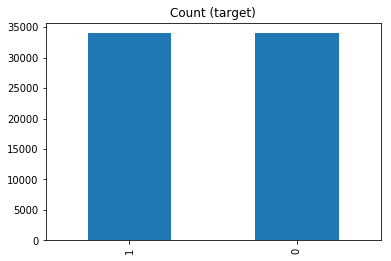

In [29]:
df_oversampling = pd.DataFrame(X_bs1)
df_oversampling['client-response'] = Y_bs1
df_oversampling['client-response'].value_counts().plot(kind='bar', title='Count (target)');

In [30]:
#----------------------------Logistic Regression Classifier----------------------------------------------
OS_LR = LogisticRegression()
OS_LR.fit(X_bs1_train,  Y_bs1_train)
Y_bs1_pred = OS_LR.predict(X_bs1_test)
Y_pred_proba = OS_LR.predict_proba(X_bs1_test)[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_bs1_test,Y_bs1_pred).ravel()
cm1 = np.array([[tp,fp],[fn,tn]])
score1 = cross_val_score(OS_LR,X_bs1, Y_bs1, cv=10, scoring='accuracy')
Acc1 = score1.mean()
pre1 = 1.*tp/(tp+fp)
rec1 = 1.*tp/(tp+fn)
f1_1  = 2*((pre1*rec1)/(pre1+rec1))
auc1 = roc_auc_score(Y_bs1_test,Y_pred_proba)
df_significance = pd.DataFrame(score1)
fpr1, tpr1, thresholds1 = roc_curve(Y_bs1_test, Y_pred_proba)

#-------------------------------Decision tree classifier----------------------------------------------
OS_DT = DecisionTreeClassifier()
OS_DT.fit(X_bs1_train,  Y_bs1_train)
Y_bs1_pred = OS_DT.predict(X_bs1_test)
Y_pred_proba = OS_DT.predict_proba(X_bs1_test)[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_bs1_test,Y_bs1_pred).ravel()
cm2=np.array([[tp,fp],[fn,tn]])
score2 = cross_val_score(OS_DT, X_bs1, Y_bs1, cv=10, scoring='accuracy')
Acc2 = score2.mean()
pre2 = 1.*tp/(tp+fp)
rec2 =  1.*tp/(tp+fn)
f1_2  = 2*((pre2*rec2)/(pre2+rec2))
auc2 = roc_auc_score(Y_bs1_test,Y_pred_proba)
df_significance['decision tree'] = score2 
fpr2, tpr2, thresholds2 = roc_curve(Y_bs1_test, Y_pred_proba)

#-----------------------------Support vector machine---------------------------------------------------- 
OS_SVM = KNeighborsClassifier(n_neighbors=3)
OS_SVM.fit(X_bs1_train,  Y_bs1_train)
Y_bs1_pred = OS_SVM.predict(X_bs1_test)
Y_pred_proba = OS_SVM.predict_proba(X_bs1_test)[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_bs1_test,Y_bs1_pred).ravel()
cm3 = np.array([[tp,fp],[fn,tn]])
score3 = cross_val_score(OS_SVM, X_bs1, Y_bs1, cv=10, scoring='accuracy')
Acc3 = score3.mean()
pre3 = 1.*tp/(tp+fp)
rec3 =   1.*tp/(tp+fn)
f1_3  =  2*((pre3*rec3)/(pre3+rec3))
auc3 = roc_auc_score(Y_bs1_test,Y_pred_proba)
df_significance['Support vector machine'] = score3
fpr3, tpr3, thresholds3 = roc_curve(Y_bs1_test, Y_pred_proba)

#----------------------------------------Skoperules Classifier-------------------------------------------------
feature_names=['age', 'default', 'housing', 'loan', 'campaign', 'previous', 'poutcome','pdays_999', 'pdays_1_9', 
               'pdays_10_19','pdays_20_29', 'job_admin', 'job_blue_collar', 'job_entrepreneur','job_housemaid',
               'job_management', 'job_retired', 'job_self_employed','job_services', 'job_student', 'job_technician',
               'job_unemployed','marital_divorced', 'marital_married', 'marital_single','education_basic_4y',
               'education_basic_6y', 'education_basic_9y','education_high_school', 'education_illiterate',
               'education_professional_course', 'education_university_degree','contact_cellular', 'contact_telephone',
               'month_apr', 'month_aug','month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may','month_nov',
               'month_oct', 'month_sep', 'day_of_week_fri','day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
               'day_of_week_wed'] 

OS_SR = SkopeRules(max_depth_duplication=None,n_estimators=30,precision_min=0.2,recall_min=0.01,feature_names=feature_names)
OS_SR.fit(X_bs1_train,  Y_bs1_train)
Y_pred = OS_SR.predict(X_bs1_test)
#Y_pred_proba = SR.predict_proba(X_test)[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_bs1_test,Y_pred).ravel()
cm4 = np.array([[tp,fp],[fn,tn]])
score4 = cross_val_score(OS_SR, X_bs1, Y_bs1, cv=10, scoring='accuracy')
Acc4 = score4.mean()
pre4 = 1.*tp/(tp+fp)
rec4 =  1.*tp/(tp+fn)
f1_4  =  2*((pre3*rec3)/(pre3+rec3))
auc4 = 0
#auc4 = roc_auc_score(Y_test,Y_pred_proba)
df_significance['Scope rules'] = score4

                
#--------------------------Random Forest Classifier------------------------------------------------------- 
OS_RF = RandomForestClassifier()
OS_RF.fit(X_bs1_train,  Y_bs1_train)
Y_bs1_pred = OS_RF.predict(X_bs1_test)
Y_pred_proba = OS_RF.predict_proba(X_bs1_test)[:,1]

#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_bs1_test,Y_bs1_pred).ravel()
cm5 = np.array([[tp,fp],[fn,tn]])
score5 = cross_val_score(OS_RF, X_bs1, Y_bs1, cv=10, scoring='accuracy')
Acc5 = score5.mean()
pre5 = 1.*tp/(tp+fp)
rec5 =  1.*tp/(tp+fn)
f1_5  =  2*((pre4*rec4)/(pre4+rec4))
auc5 = roc_auc_score(Y_bs1_test,Y_pred_proba)
df_significance['Random forest'] = score5
fpr5, tpr5, thresholds5 = roc_curve(Y_bs1_test, Y_pred_proba)



In [31]:
SMOTE_OS = pd.DataFrame({
    'Metric': ['confusion matrix','Accuracy', 'Precision', 'Recall', 'F1 Score','auc'],
    'LR_SMOTE': [cm1, Acc1, pre1, rec1, f1_1, auc1],
    'DT_SMOTE' : [cm2, Acc2, pre2, rec2, f1_2, auc2],
    'SVM_SMOTE' : [cm3, Acc3, pre3, rec3, f1_3, auc3],
    'SR_SMOTE': [cm4, Acc4, pre4, rec4, f1_4, auc4],
     'RF_SMOTE': [cm5, Acc5, pre5, rec5, f1_5, auc5]})
SMOTE_OS

,Metric,LR_SMOTE,DT_SMOTE,SVM_SMOTE,SR_SMOTE,RF_SMOTE
0,confusion matrix,"[[7615, 2640], [3644, 8533]]","[[10175, 1157], [1084, 10016]]","[[10340, 2283], [919, 8890]]","[[10229, 6890], [1030, 4283]]","[[10251, 552], [1008, 10621]]"
1,Accuracy,0.567152,0.781587,0.769052,0.477867,0.830502
2,Precision,0.742565,0.8979,0.81914,0.597523,0.948903
3,Recall,0.676348,0.903721,0.918376,0.908518,0.910472
4,F1 Score,0.707911,0.900801,0.865924,0.865924,0.720911
5,auc,0.798574,0.901921,0.911503,0,0.968928


**Inference :**
>It can be seen that from the above results obtained by applying three sampling techiniques on five classifiers, Oversampling using SMOTE has better performance.

<a id='#4'></a>
## 4. Feature Selection

In [32]:
from sklearn.decomposition import PCA
#for oversampled data
pca_smote = PCA(n_components=0.90)
X_bs1_pca = pca_smote.fit_transform(X_bs1)
X_bs1_pca.shape

(67974, 22)

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
#Feature extraction
pp=df_clean.drop(columns='client-response', axis=1)
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_bs1, Y_bs1)
feature_importances_bs1 = pd.DataFrame(model.feature_importances_,index = pp.columns,columns=['importance']).sort_values('importance',ascending=False)

In [34]:
print (feature_importances_bs1 .nlargest(22, 'importance'))

                             importance
age                            0.098845
campaign                       0.074225
contact_telephone              0.045552
contact_cellular               0.045250
default                        0.041373
month_may                      0.038517
poutcome                       0.033172
housing                        0.031443
month_jun                      0.025545
pdays_999                      0.023984
month_apr                      0.023930
day_of_week_mon                0.022481
job_admin                      0.022039
day_of_week_thu                0.021672
day_of_week_fri                0.021607
month_oct                      0.021368
month_jul                      0.021181
month_nov                      0.021116
loan                           0.019880
job_blue_collar                0.019833
education_university_degree    0.019763
previous                       0.019537


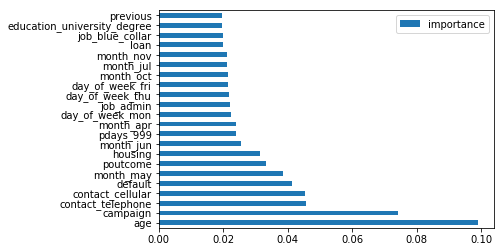

In [35]:
#Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.
feature_importances_bs1.nlargest(22, 'importance').plot(kind='barh')
plt.savefig("feature importance.png")
plt.show()


#### Over Sampling -SMOTE model evaluation with only important features obtained by extra tree classifier.

In [36]:
X_bs1_etc = pd.DataFrame(X_bs1)[[0,1,2,3,4,6,7,11,32,33,34,35,38,39,40,41,42,44,45,46,47,48]].copy()
#dividing into train(67%) and test(33%) data
X_bs1_etc_train, X_bs1_etc_test, Y_bs1_train, Y_bs1_test, = train_test_split(X_bs1_etc, Y_bs1, test_size=0.33, random_state=42)


#----------------------------Logistic Regression Classifier----------------------------------------------
OS_LR_ETC = LogisticRegression()
OS_LR_ETC.fit(X_bs1_etc_train,  Y_bs1_train)
Y_bs1_pred = OS_LR_ETC.predict(X_bs1_etc_test)
Y_pred_proba = OS_LR_ETC.predict_proba(X_bs1_etc_test)[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_bs1_test,Y_bs1_pred).ravel()
cm1 = np.array([[tp,fp],[fn,tn]])
score1 = cross_val_score(OS_LR_ETC, X_bs1_etc, Y_bs1, cv=10, scoring='accuracy')
Acc1 = score1.mean()
pre1 = 1.*tp/(tp+fp)
rec1 = 1.*tp/(tp+fn)
f1_1  = 2*((pre1*rec1)/(pre1+rec1))
auc1 = roc_auc_score(Y_bs1_test,Y_pred_proba)
results_c = []


#-------------------------------Decision tree classifier----------------------------------------------
OS_DT_ETC = DecisionTreeClassifier()
OS_DT_ETC.fit(X_bs1_etc_train,  Y_bs1_train)
Y_bs1_pred = OS_DT_ETC.predict(X_bs1_etc_test)
Y_pred_proba = OS_DT_ETC.predict_proba(X_bs1_etc_test)[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_bs1_test,Y_bs1_pred).ravel()
cm2=np.array([[tp,fp],[fn,tn]])
score2 = cross_val_score(OS_DT_ETC, X_bs1_etc, Y_bs1, cv=10, scoring='accuracy')
Acc2 = score2.mean()
pre2 = 1.*tp/(tp+fp)
rec2 =  1.*tp/(tp+fn)
f1_2  = 2*((pre2*rec2)/(pre2+rec2))
auc2 = roc_auc_score(Y_bs1_test,Y_pred_proba)


#-----------------------------Support vector machine---------------------------------------------------- 
OS_SVM_ETC = KNeighborsClassifier(n_neighbors=3)
OS_SVM_ETC.fit(X_bs1_etc_train,  Y_bs1_train)
Y_bs1_pred = OS_SVM_ETC.predict(X_bs1_etc_test)
Y_pred_proba = OS_SVM_ETC.predict_proba(X_bs1_etc_test)[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_bs1_test,Y_bs1_pred).ravel()
cm3 = np.array([[tp,fp],[fn,tn]])
score3 = cross_val_score(OS_SVM_ETC, X_bs1_etc, Y_bs1, cv=10, scoring='accuracy')
Acc3 = score3.mean()
pre3 = 1.*tp/(tp+fp)
rec3 =   1.*tp/(tp+fn)
f1_3  =  2*((pre3*rec3)/(pre3+rec3))
auc3 = roc_auc_score(Y_bs1_test,Y_pred_proba)


#----------------------------------------Skoperules Classifier-------------------------------------------------
feature_names=['age','campaign','default','contact_telephone','contact_cellular','month_may','housing','month_jun',
               'pdays_999','poutcome','month_apr','day_of_week_fri','day_of_week_mon','month_jul','pdays_1_9',
               'month_aug','day_of_week_thu','day_of_week_wed','month_oct','loan','job_admin','day_of_week_tue']

OS_SR_ETC = SkopeRules(max_depth_duplication=None,n_estimators=30,precision_min=0.2,recall_min=0.01,feature_names=feature_names)
OS_SR_ETC.fit(X_bs1_etc_train,  Y_bs1_train)
Y_pred = OS_SR_ETC.predict(X_bs1_etc_test)
#Y_pred_proba = SR.predict_proba(X_test)[:,1]
#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_bs1_test,Y_pred).ravel()
cm4 = np.array([[tp,fp],[fn,tn]])
score4 = cross_val_score(OS_SR_ETC, X_bs1_etc, Y_bs1, cv=10, scoring='accuracy')
Acc4 = score4.mean()
pre4 = 1.*tp/(tp+fp)
rec4 =  1.*tp/(tp+fn)
f1_4  =  2*((pre3*rec3)/(pre3+rec3))
auc4 = 0
#auc4 = roc_auc_score(Y_test,Y_pred_proba)

                
#--------------------------Random Forest Classifier------------------------------------------------------- 
OS_RF_ETC = RandomForestClassifier()
OS_RF_ETC.fit(X_bs1_etc_train,  Y_bs1_train)
Y_bs1_pred = OS_RF_ETC.predict(X_bs1_etc_test)
Y_pred_proba = OS_RF_ETC.predict_proba(X_bs1_etc_test)[:,1]

#calculating the metrics
tn, fp, fn, tp = confusion_matrix(Y_bs1_test,Y_bs1_pred).ravel()
cm5 = np.array([[tp,fp],[fn,tn]])
score5 = cross_val_score(OS_RF_ETC, X_bs1_etc, Y_bs1, cv=10, scoring='accuracy')
Acc5 = score5.mean()
pre5 = 1.*tp/(tp+fp)
rec5 =  1.*tp/(tp+fn)
f1_5  =  2*((pre4*rec4)/(pre4+rec4))
auc5 = roc_auc_score(Y_bs1_test,Y_pred_proba)




In [37]:
SMOTE_OS_ETC = pd.DataFrame({
    'Metric': ['confusion matrix','Accuracy', 'Precision', 'Recall', 'F1 Score','auc'],
    'LR_SMOTE': [cm1, Acc1, pre1, rec1, f1_1, auc1],
    'DT_SMOTE' : [cm2, Acc2, pre2, rec2, f1_2, auc2],
    'SVM_SMOTE' : [cm3, Acc3, pre3, rec3, f1_3, auc3],
    'SR_SMOTE': [cm4, Acc4, pre4, rec4, f1_4, auc4],
     'RF_SMOTE': [cm5, Acc5, pre5, rec5, f1_5, auc5]})
SMOTE_OS_ETC

,Metric,LR_SMOTE,DT_SMOTE,SVM_SMOTE,SR_SMOTE,RF_SMOTE
0,confusion matrix,"[[7757, 3135], [3502, 8038]]","[[9901, 1007], [1358, 10166]]","[[9468, 1482], [1791, 9691]]","[[10224, 6884], [1035, 4289]]","[[9955, 801], [1304, 10372]]"
1,Accuracy,0.558664,0.780895,0.732184,0.481412,0.791899
2,Precision,0.712174,0.907682,0.864658,0.597615,0.92553
3,Recall,0.68896,0.879385,0.840927,0.908074,0.884182
4,F1 Score,0.700375,0.89331,0.852627,0.852627,0.720838
5,auc,0.784884,0.89983,0.907492,0,0.951494


- It has been observed that similar accuracy scores can be acheived by just using features enough to capture 90% of the variance.  
- Using PCA and extra tree classifier it is  found that only 24 features out of 55 features are needed to capture 90% of the variance.
- Therefore using PCA and extra tree classifier,the number of features used drastically can be reduced(hence reduce the computational resources used and time taken to train) and still obtain the same accuracy. 
 

In [38]:
df_significance.rename(columns={0:'LR'},inplace=True)
df_significance

,LR,decision tree,Support vector machine,Scope rules,Random forest
0,0.765078,0.627538,0.810533,0.030744,0.647396
1,0.853928,0.888350,0.921889,0.090321,0.937629
2,0.456899,0.791409,0.749044,0.130332,0.838188
3,0.602530,0.890703,0.833333,0.146808,0.952927
4,0.581642,0.894822,0.828626,0.168457,0.955428
5,0.437187,0.840100,0.762430,0.655289,0.910121
6,0.493675,0.738600,0.699912,0.896866,0.807296
7,0.475574,0.655827,0.649941,0.888480,0.662007
8,0.490288,0.781783,0.728075,0.878623,0.864479
9,0.514715,0.706739,0.706739,0.892747,0.729547


<a id='#5'></a>
## 5. Statistical Significance

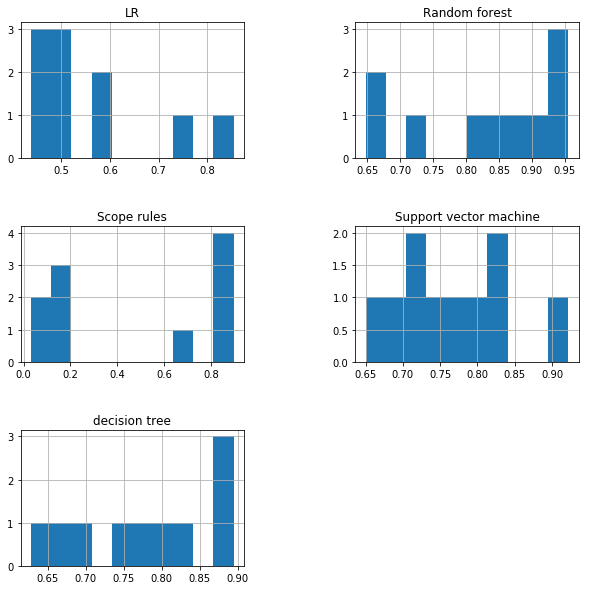

In [39]:
header = ['LR','decision tree','Support vector machine','Scope rules','Random forest']
df_significance.hist(figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.savefig("significance.png")
plt.show()


In [40]:
# A function to print the results
def statistical_significance (stat,p):
    print("Statistics : ",stat)
    print("p-value : ", p )
    if (p < 0.05):
        print("Null hypothesis is rejected and there is statistically significant difference\n")
    else:
        print("Null hypothesis is accepted and there is no statistically significant difference\n")
    pass

In [41]:
from scipy.stats import wilcoxon

print ("Wilcoxon signed-rank test for Logistic Regression and decision tree classifier")
one,two = wilcoxon(df_significance['LR'], df_significance['decision tree'])
statistical_significance (one,two)

print ("Wilcoxon signed-rank test for Logistic Regression and Support vector machine")
one,two = wilcoxon(df_significance['LR'], df_significance['Support vector machine'])
statistical_significance (one,two)

print ("Wilcoxon signed-rank test for Logistic Regression and Scope rules")
one,two = wilcoxon(df_significance['LR'], df_significance['Scope rules'])
statistical_significance (one,two)

print ("Wilcoxon signed-rank test for Logistic Regression and Random forest")
one,two = wilcoxon(df_significance['LR'], df_significance['Random forest'])
statistical_significance (one,two)

print ("Wilcoxon signed-rank test for decision tree and Support vector machine")
one,two = wilcoxon(df_significance['decision tree'], df_significance['Support vector machine'])
statistical_significance (one,two)

print ("Wilcoxon signed-rank test for decision tree and Scope rules")
one,two = wilcoxon(df_significance['decision tree' ], df_significance['Scope rules'])
statistical_significance (one,two)

print ("Wilcoxon signed-rank test for decision tree and Random forest")
one,two = wilcoxon(df_significance['decision tree' ], df_significance['Random forest'])
statistical_significance (one,two)

print ("Wilcoxon signed-rank test for Support vector machine and Scope rules")
one,two = wilcoxon(df_significance['Support vector machine'], df_significance['Scope rules'])
statistical_significance (one,two)

print ("Wilcoxon signed-rank test for Support vector machine and Random forest")
one,two = wilcoxon(df_significance['Support vector machine'], df_significance['Random forest'])
statistical_significance (one,two)

print ("Wilcoxon signed-rank test for Scope rules and Random forest")
one,two = wilcoxon(df_significance['Scope rules'], df_significance['Random forest'])
statistical_significance (one,two)

Wilcoxon signed-rank test for Logistic Regression and decision tree classifier
Statistics :  2.0
p-value :  0.009344113002204883
Null hypothesis is rejected and there is statistically significant difference

Wilcoxon signed-rank test for Logistic Regression and Support vector machine
Statistics :  0.0
p-value :  0.005062032126267864
Null hypothesis is rejected and there is statistically significant difference

Wilcoxon signed-rank test for Logistic Regression and Scope rules
Statistics :  19.0
p-value :  0.3862707203664827
Null hypothesis is accepted and there is no statistically significant difference

Wilcoxon signed-rank test for Logistic Regression and Random forest
Statistics :  2.0
p-value :  0.009344113002204883
Null hypothesis is rejected and there is statistically significant difference

Wilcoxon signed-rank test for decision tree and Support vector machine
Statistics :  11.0
p-value :  0.1730709208049953
Null hypothesis is accepted and there is no statistically significant di

C:\Users\ganip\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


**Since the above 10 fold accuracies for each classifier are not normally distributed we use non parametric test which is Wilcoxon signed-rank test**

##### There is statistically significant difference between decision tree and Random forest, Logistic Regression and Random forest, Logistic Regression and Support vector machine, Logistic Regression and decision tree classifier

<a id='#6'></a>
## 6. Model evaluation

### Evaluating three balancing approaches

In [42]:
CSCLR1 = CSCLR.T
BBC1 = BBC.T
SMOTE_OS1 = SMOTE_OS.T
frames = [CSCLR1, BBC1, SMOTE_OS1]
result1 = pd.concat(frames)
result1.drop(['Metric'],axis=0,inplace=True)

In [43]:
result1.rename(columns={0: 'confusion matrix',1:'Accuracy',2: 'Precision',3: 'Recall',4: 'F1 Score',5:'auc',6:'costloss'}, inplace = True)
result1.fillna(0, inplace=True)
result1

,confusion matrix,Accuracy,Precision,Recall,F1 Score,auc,costloss
LR_CSCLR,"[[1304, 10273], [125, 919]]",0.176135,0.112637,0.912526,0.200523,0.534065,11648.0
DT_CSCLR,"[[1167, 5611], [262, 5581]]",0.534664,0.172175,0.816655,0.284391,0.664934,8493.0
SVM_CSCLR,"[[1032, 3946], [397, 7246]]",0.655891,0.207312,0.722183,0.322148,0.761582,8313.0
RF_CSCLR,"[[1239, 6512], [190, 4680]]",0.468980,0.159850,0.867040,0.269935,0.703992,8602.0
LR_BBC,"[[803, 1817], [626, 9375]]",0.388067,0.306489,0.561931,0.396641,0.762036,8703.0
DT_BBC,"[[734, 1646], [695, 9546]]",0.464281,0.308403,0.513646,0.385403,0.728018,9291.0
SVM_BBC,"[[779, 2779], [650, 8413]]",0.471395,0.218943,0.545136,0.312412,0.702617,9929.0
SR_BBC,"[[1429, 11192], [0, 0]]",0.180224,0.113224,1.000000,0.312412,0.000000,11192.0
RF_BBC,"[[808, 1659], [621, 9533]]",0.180224,0.327523,0.565430,0.203416,0.759422,8490.0
LR_SMOTE,"[[7615, 2640], [3644, 8533]]",0.567152,0.742565,0.676348,0.707911,0.798574,0.0


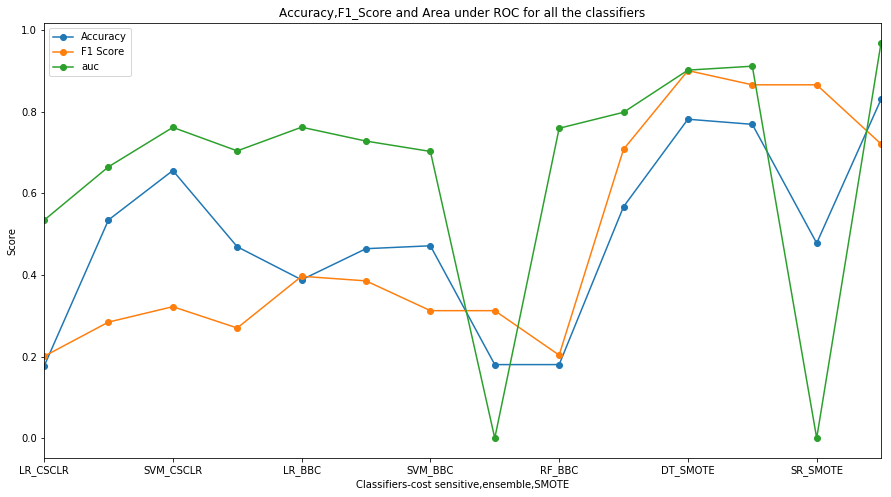

In [44]:
plot = result1[['Accuracy','F1 Score','auc']].plot(kind ='line',figsize = (15,8), marker = 'o')
plt.title('Accuracy,F1_Score and Area under ROC for all the classifiers')
plt.ylabel('Score')
plt.xlabel('Classifiers-cost sensitive,ensemble,SMOTE')
plt.savefig("metrics.png")
plt.show()


#### Observation: From the above results it can be clearly observed that the Oversampling with SMOTE techinique has higher Accuracies, F1 scores and areas under ROC compare to other two approaches (cost sensitive and Balance bagging ensemble classifier)

> Further investigation is needed to recognize the best classifier among the five classifiers with Oversampled bank marketing dataset

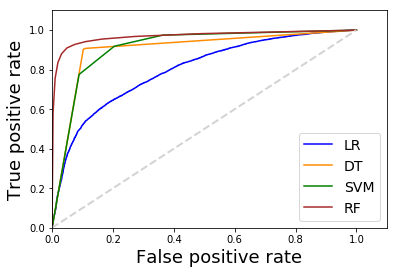

In [45]:
from sklearn.metrics import roc_curve

plt.plot(fpr1, tpr1,label = 'LR', color='blue')

plt.plot(fpr2, tpr2,label = 'DT', color='darkorange')

plt.plot(fpr3, tpr3, label = 'SVM', color='green')

plt.plot(fpr5, tpr5,  label = 'RF', color='brown')

x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2)
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.savefig("RF_ROC.png")
plt.show()


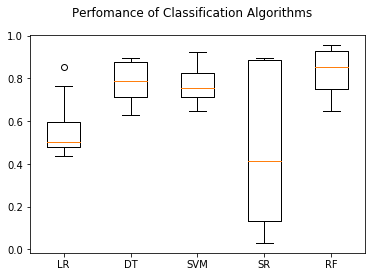

In [46]:
df_significance1=df_significance.T
names_c = ['LR','DT','SVM','SR','RF']
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(df_significance1)
ax.set_xticklabels(names_c)
plt.savefig("RF_Accuracy.png")
plt.show()

**Random forest classifier is the best performing model.**

Among all algorithms, Random forest achieved an accuracy of about 82%, suggesting a high level of strength of this model to classify the customer response given all the defined customer features. 

#### Test RF model on the test set

In [47]:
OS_RF = RandomForestClassifier()
OS_RF.fit(X_bs1_train,  Y_bs1_train)
Y_bs1_pred = OS_RF.predict(X_bs1_test)
# Accuracy Score 
print(accuracy_score(Y_bs1_test, Y_bs1_pred))

0.9272913694721826


Accuracy score is the percentage of correct predictions out of all predictions made. The RF algorithm achieves an accuracy of 92.64%, suggesting high level of strength of this model to classify the customer response given all the defined customer features. 

[[10588   585]
 [ 1046 10213]]


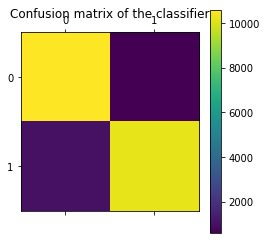

In [48]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(Y_bs1_test, Y_bs1_pred))

cm = confusion_matrix(Y_bs1_test, Y_bs1_pred)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
plt.savefig("RF_confusion matrix.png")
pl.show()

A confusion matrix gives a detailed breakdown of prediction result and error types. Each cell in the matrix represents a combination of instances of the predicted response and the actual response. In the test set, the matrix proves that the algorithm performed well because most test results (10597 True Positive and 10186 true negative predictions) locate on the diagonal cells which represent correct predictions. 1073 tests (False negative) predicted the bank’s client would subscribe to the term deposit but they actually did not. 

**The confusion matrix thus reveals that the random forest classifier is accurately classifying the subscription of the clients.** This infers that the accuracy score is unbiased, and further evaluation also prove the same

In [49]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_bs1_test, Y_bs1_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     11173
           1       0.95      0.91      0.93     11259

    accuracy                           0.93     22432
   macro avg       0.93      0.93      0.93     22432
weighted avg       0.93      0.93      0.93     22432



Classification report shows the precision, recall, F1 and support scores for the RF classification model. 
* Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 91%. 
* Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 95% correctly that they would decline the offer. 

* Precision of 1 (the client said yes) represents that for all instances predicted as yes subscription, the percentage of clients that actually said yes is 95%. 
* Recall of 1 indicates that for all clients that actually said yes, the model predicts 90% correctly that they would accept the offer. 


In general, the report shows that **RF model has great predictive power to identify the customers who would subscribe and who would not subscribe to the term deposit**. Hence we can conclude that RF algorithm can accurately classify those who are more likely to subscribe.

<a id='#7'></a>
## 7. Results
Five learning algorithms were evaluated, namely, logistic regression, decision trees, support vector machine, rule based and random forest in building cost sensitive classifiers, balance bagging ensemble classifier and oversampling (SMOTE) technique. It is observed that Random forest classifier with oversampling technique performed well with test set accuracy of 92.64%, AUC of 96% AND F1- score of 72%.

##### Discussions
1.	Based on the feature importance plot, some recommendations can be made to the bank’s marketing team:
 -	The marketing team should target relatively old age customers who would be looking for safe and proﬁtable investment options. The marketers should ensure to convey the peace of mind and steady source of income these products provide as a value proposition to these customers. 
 -	Although the ‘duration’ (length of marketing phone call) variable was not used in the prediction models for various reasons cited earlier, the correlation of the ‘duration’ variable with the target variable shows that the higher the duration, the more likely it is that the customer will subscribe to the term deposits. This makes intuitive sense because longer duration shows that the customer is interested in the product. Hence, the marketers should try to make the call engaging and increase the duration of the call
 -	The marketing team should prioritize those customers to whom they previously reached out during previous campaigns. They are likely to subscribe for the term deposit.
2.	Based on the performance of the algorithmic level approach in handling class imbalance, a below question can be addressed.
 -	Why over-sampling outperformed cost sensitive learning and balanced bagging learning? 

>Firstly, many existing learning algo¬rithms are not designed to handle issues such as imbalanced data sets and to be cost sensitive. Cost sensitive learning just provides a way of “wrapping” the learning algorithms to handle the issues. Therefore, cost sensitive learning may not work well for certain data sets. 

>Secondly, bagging algorithms does not produce good results if the features are correlated. Therefore, this method might have failed as the bank dataset has correlated features.

>Finally, it is noticed that the over-fitting problem that could be triggered by over-sam¬pling (as discussed in Cost Sensitive Learning) did not occur in this data set. After over-sampling, the decision region for the rare class can be clearly generalized. Therefore, the learning algorithm involved can identify the rare class eas¬ily.


<a id='#8'></a>
## 8. Conclusion & Recommendations

In this study, cost sensitive learning, ensemble based unbalanced learning and oversampling (SMOTE) method were applied using Linear classification, Tree based, Distance based, Rule based, Ensemble based algorithms on the imbalanced bank direct marketing data set. 

The classifiers and unbalanced approaches are contrasted using the results obtained in this study.

To conclude, cost sensitive learning and balanced bagging algorithm (an algorithm-level approach) are less effective for the bank direct marketing data set. Over-sampling (a data-level approach) should be the preference instead.

The followings work could be considered as the future research.
- Firstly, to evaluate cost sensitive classification and to find out how would learning algorithms respond when the probability threshold is adjusted according to different error cost ratios. 
- Secondly, to evaluate balanced bagging – ensemble-based imbalance learn algorithm on different other base classifiers to check if there will be any improvement in the performance.


<a id='#9'></a>
## 9. References

- [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing.     Decision Support Systems, Elsevier, 62:22-31, June 2014 
”http://media.salford-systems.com/video/tutorial/2015/targeted_marketing.pdf”
- Yang Q, Wu X. 10 Challenging Problems in Data Mining Research. International Journal of Information Technology & Decision Making. 2006 Dec; 5(04):597-04.
- Kotsiantis S, Kanellopoulos D, Pintelas P. Handling imbalanced datasets: A review. GESTS International Transactions on Computer Science and Engineering. 2006 Dec; 30(1):25-36.
- Zhou B, Liu Q. Springer Berlin Heidelberg: A comparison study of cost-sensitive classifier evaluations. International Conference on Brain Informatics. 2012 Dec; p. 360-71.
- https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/
- N. V. Chawla, K. W. Bowyer, L. O. Hall, W. P. Kegelmeyer: SMOTE: Synthetic Minority Over-Sampling Technique 
- Ling CX, Sheng VS. Springer US: Cost-sensitive learning. Encyclopedia of Machine Learning. 2008; p. 231-35.